### Images Processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from image_processing import images_labels

raw_data = "/content/drive/MyDrive/Colab Notebooks/mrlEyes_2018_01_on"

images, labels = images_labels(raw_data)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 10257/10257 [00:26<00:00, 388.83it/s]


In [ ]:
print(images.shape, labels.shape)

(84845, 64, 64, 1) (84845,)


In [ ]:
from tensorflow.keras.utils import to_categorical

labels= to_categorical(labels)

print(labels.shape)

(84845, 2)


### Train, Test and validation sets

In [ ]:

from sklearn.model_selection import train_test_split


X_train, X_rem, y_train, y_rem = train_test_split(images, labels, train_size=0.7,random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,random_state=123)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(59391, 64, 64, 1)
(59391, 2)
(12727, 64, 64, 1)
(12727, 2)
(12727, 64, 64, 1)
(12727, 2)


### Model Training

In [ ]:
from model_architecture import create_model

In [ ]:
image_size = 64
model= create_model(input_shape=(image_size,image_size,1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 64, 64, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                        

### Data Augmentation:
For Making Model more robut to variation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=10, 
        width_shift_range=0.2,
        height_shift_range=0.2, 
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.5,1.5]
)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 1000
epochs = 100

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
                    epochs = epochs, 
                    steps_per_epoch = X_train.shape[0]//batch_size,
                    validation_data = (X_val, y_val), 
                    validation_steps = X_val.shape[0]//batch_size
         )

Epoch 1/100
59/59 [==============================] - 22s 234ms/step - loss: 1.1396 - accuracy: 0.0510 - val_loss: 0.9125 - val_accuracy: 0.0530
Epoch 2/100
59/59 [==============================] - 9s 158ms/step - loss: 0.7414 - accuracy: 0.1883 - val_loss: 0.6120 - val_accuracy: 0.3167
Epoch 3/100
59/59 [==============================] - 9s 158ms/step - loss: 0.6347 - accuracy: 0.2693 - val_loss: 0.5599 - val_accuracy: 0.4592
Epoch 4/100
59/59 [==============================] - 9s 160ms/step - loss: 0.5742 - accuracy: 0.3566 - val_loss: 0.5101 - val_accuracy: 0.5625
Epoch 5/100
59/59 [==============================] - 9s 157ms/step - loss: 0.5229 - accuracy: 0.4296 - val_loss: 0.4615 - val_accuracy: 0.6125
Epoch 6/100
59/59 [==============================] - 9s 159ms/step - loss: 0.4957 - accuracy: 0.4672 - val_loss: 0.4257 - val_accuracy: 0.6377
Epoch 7/100
59/59 [==============================] - 10s 161ms/step - loss: 0.4639 - accuracy: 0.5232 - val_loss: 0.3994 - val_accuracy: 0.65

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/mrlEyes_2018_01_on/model.h5')

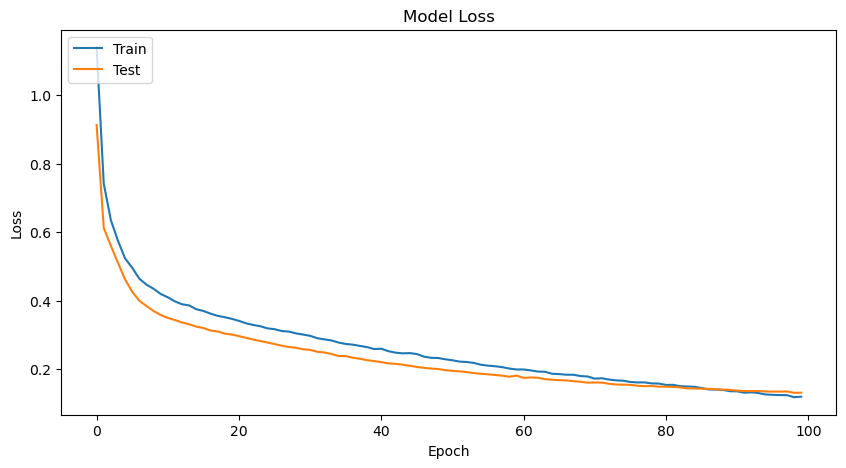

In [66]:
figure = plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

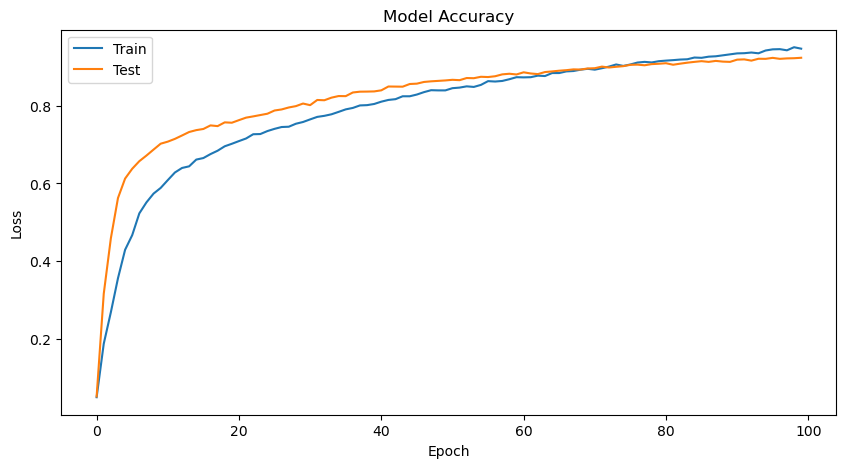

In [83]:
import matplotlib.pyplot as plt
figure2 = plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()


### Retraining the model for 50 extra epochs

In [2]:
history2 = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
                    epochs = epochs, 
                    steps_per_epoch = X_train.shape[0]//batch_size,
                    validation_data = (X_val, y_val), 
                    validation_steps = X_val.shape[0]//batch_size
         )

Epoch 1/50
59/59 [==============================] - 10s 163ms/step - loss: 0.1149 - accuracy: 0.9485 - val_loss: 0.1307 - val_accuracy: 0.9230
Epoch 2/50
59/59 [==============================] - 9s 160ms/step - loss: 0.1177 - accuracy: 0.9505 - val_loss: 0.1206 - val_accuracy: 0.9233
Epoch 3/50
59/59 [==============================] - 10s 162ms/step - loss: 0.1149 - accuracy: 0.9490 - val_loss: 0.1282 - val_accuracy: 0.9274
Epoch 4/50
59/59 [==============================] - 10s 168ms/step - loss: 0.1116 - accuracy: 0.9511 - val_loss: 0.1213 - val_accuracy: 0.9287
Epoch 5/50
59/59 [==============================] - 10s 164ms/step - loss: 0.1111 - accuracy: 0.9530 - val_loss: 0.1180 - val_accuracy: 0.9300
Epoch 6/50
59/59 [==============================] - 10s 168ms/step - loss: 0.1081 - accuracy: 0.9530 - val_loss: 0.1139 - val_accuracy: 0.9312
Epoch 7/50
59/59 [==============================] - 10s 166ms/step - loss: 0.1085 - accuracy: 0.9543 - val_loss: 0.1148 - val_accuracy: 0.9322


### Combined Perfomance Plot for 150 epochs

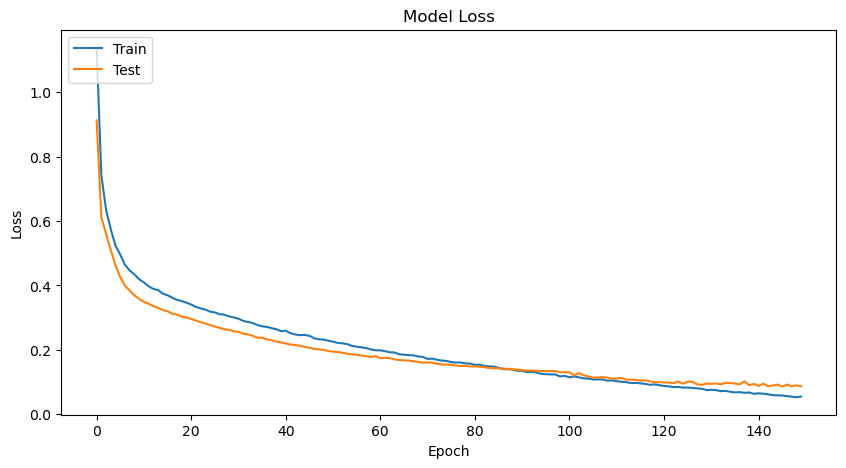

In [77]:
figure = plt.figure(figsize=(10, 5))
plt.plot(history.history['loss']+history2.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss']+history2.history['val_loss'], label='Validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

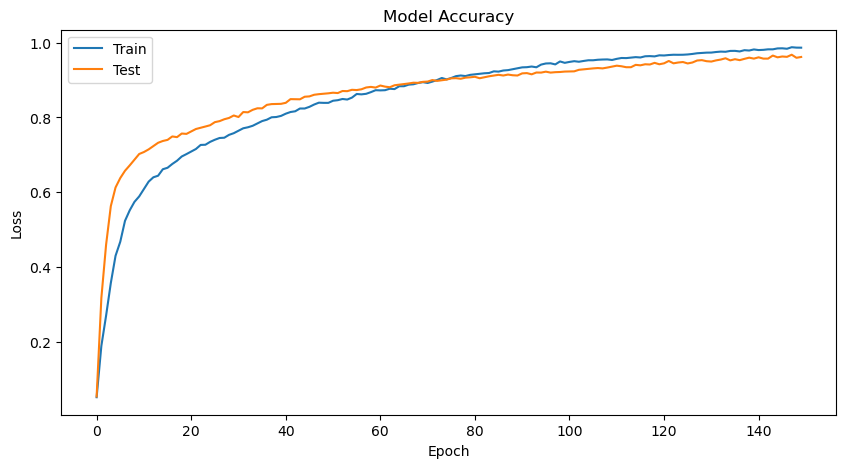

In [72]:
figure = plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy']+history2.history['accuracy'], label='Train_accuracy')
plt.plot(history.history['val_accuracy']+history2.history['val_accuracy'], label='Validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

### Model Performance

In [3]:
#Evaluating Model on Test Set
pred = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {pred[1]}')

print(f'Test Loss: {pred[0]}')

398/398 [==============================] - 2s 5ms/step - loss: 0.0872 - accuracy: 0.9618
Test Accuracy: 0.9618351998138428
Test Loss: 0.0872402997970581


In [5]:
#Classification Report
from sklearn.metrics import classification_report
import numpy as np

ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
y_test_Actual = np.argmax(y_test, axis=1)
print(classification_report(y_test_Actual, ypred))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6218
           1       0.96      0.97      0.96      6517

    accuracy                           0.96     12735
   macro avg       0.97      0.97      0.96     12735
weighted avg       0.97      0.97      0.96     12735


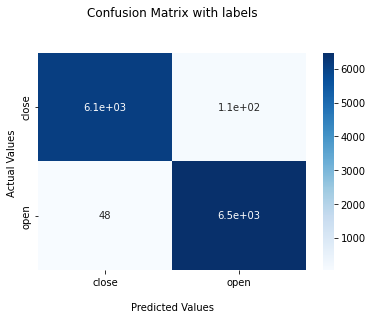

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test_Actual, ypred)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['close','open'])
ax.yaxis.set_ticklabels(['close','open'])

plt.show()